<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.420665,54.915710,0.000890,119.337265,119.336579,0.000686
1,0.0,1.0,81.664258,97.134478,-0.000008,188.798728,188.798248,0.000480
2,0.0,2.0,59.489400,43.957632,-0.001716,113.445316,113.447453,-0.002138
3,0.0,3.0,55.553149,84.210139,-0.000846,149.762442,149.762955,-0.000513
4,0.0,4.0,58.073441,34.874232,0.000926,102.948599,102.948258,0.000341
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,64.036760,85.238965,-0.000368,159.275356,159.275581,-0.000225
249996,999.0,246.0,45.470837,99.840563,0.000101,155.311501,155.310962,0.000539
249997,999.0,247.0,92.659765,57.141799,-0.000009,159.801555,159.801940,-0.000385
249998,999.0,248.0,37.911615,49.794555,0.003627,97.709797,97.706268,0.003529


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.420665  54.915710  0.000890  119.337265  119.336579  0.000686
      1.0    81.664258  97.134478 -0.000008  188.798728  188.798248  0.000480
      2.0    59.489400  43.957632 -0.001716  113.445316  113.447453 -0.002138
      3.0    55.553149  84.210139 -0.000846  149.762442  149.762955 -0.000513
      4.0    58.073441  34.874232  0.000926  102.948599  102.948258  0.000341
...                ...        ...       ...         ...         ...       ...
999.0 245.0  64.036760  85.238965 -0.000368  159.275356  159.275581 -0.000225
      246.0  45.470837  99.840563  0.000101  155.311501  155.310962  0.000539
      247.0  92.659765  57.141799 -0.000009  159.801555  159.801940 -0.000385
      248.0  37.911615  49.794555  0.003627   97.709797   97.706268  0.003529
      249.0  56.433561  81.451586  0.000279  147.885426  147.884997  0.000429

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.420665  54.915710  0.000890  119.337265  119.336579  0.000686
      1.0    81.664258  97.134478 -0.000008  188.798728  188.798248  0.000480
      2.0    59.489400  43.957632 -0.001716  113.445316  113.447453 -0.002138
      3.0    55.553149  84.210139 -0.000846  149.762442  149.762955 -0.000513
      4.0    58.073441  34.874232  0.000926  102.948599  102.948258  0.000341
...                ...        ...       ...         ...         ...       ...
999.0 245.0  64.036760  85.238965 -0.000368  159.275356  159.275581 -0.000225
      246.0  45.470837  99.840563  0.000101  155.311501  155.310962  0.000539
      247.0  92.659765  57.141799 -0.000009  159.801555  159.801940 -0.000385
      248.0  37.911615  49.794555  0.003627   97.709797   97.706268  0.003529
      249.0  56.433561  81.451586  0.000279  147.885426  147.884997  0.000429

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.420665,54.915710,0.000890,119.337265,119.336579,0.000686
1,0.0,1.0,81.664258,97.134478,-0.000008,188.798728,188.798248,0.000480
2,0.0,2.0,59.489400,43.957632,-0.001716,113.445316,113.447453,-0.002138
3,0.0,3.0,55.553149,84.210139,-0.000846,149.762442,149.762955,-0.000513
4,0.0,4.0,58.073441,34.874232,0.000926,102.948599,102.948258,0.000341
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,64.036760,85.238965,-0.000368,159.275356,159.275581,-0.000225
249996,999.0,246.0,45.470837,99.840563,0.000101,155.311501,155.310962,0.000539
249997,999.0,247.0,92.659765,57.141799,-0.000009,159.801555,159.801940,-0.000385
249998,999.0,248.0,37.911615,49.794555,0.003627,97.709797,97.706268,0.003529


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.420665  54.915710  0.000890  119.337265  119.336579  0.000686
      1.0    81.664258  97.134478 -0.000008  188.798728  188.798248  0.000480
      2.0    59.489400  43.957632 -0.001716  113.445316  113.447453 -0.002138
      3.0    55.553149  84.210139 -0.000846  149.762442  149.762955 -0.000513
      4.0    58.073441  34.874232  0.000926  102.948599  102.948258  0.000341
...                ...        ...       ...         ...         ...       ...
999.0 245.0  64.036760  85.238965 -0.000368  159.275356  159.275581 -0.000225
      246.0  45.470837  99.840563  0.000101  155.311501  155.310962  0.000539
      247.0  92.659765  57.141799 -0.000009  159.801555  159.801940 -0.000385
      248.0  37.911615  49.794555  0.003627   97.709797   97.706268  0.003529
      249.0  56.433561  81.451586  0.000279  147.885426  147.884997  0.000429

[250000 rows x 6 columns]

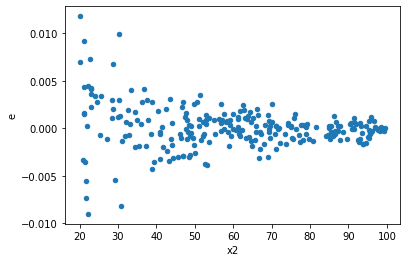

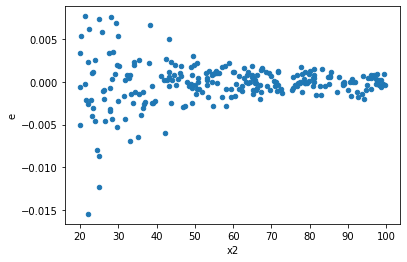

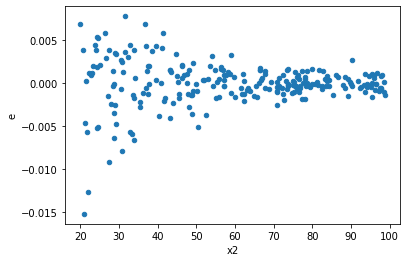

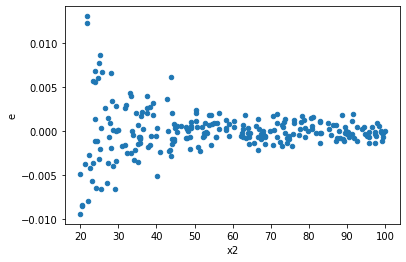

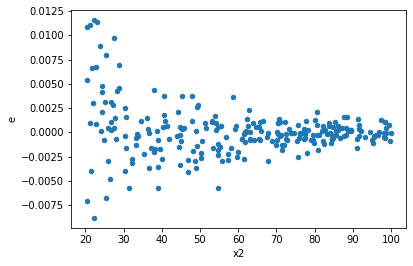

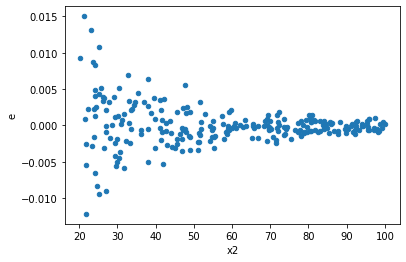

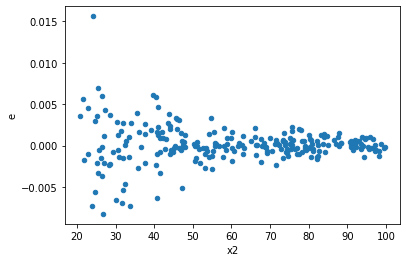

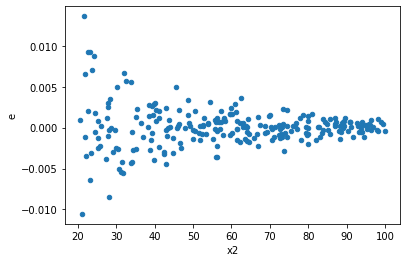

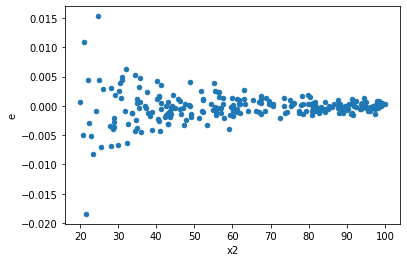

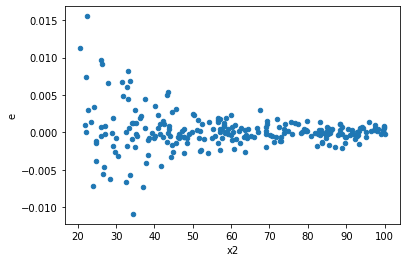

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,114.0,132.0,0.00023298771414430704,0.0014645699787194362,2.043751878458834e-06,1.109522711151088e-05,5.4288523124821015,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,143.0,103.0,0.00040356872211856106,0.001302179768851157,2.8221588959339935e-06,1.2642522027681137e-05,4.4797343076237714,3.730349362740526e-14,0.9999999999999813,1.865174681370263e-14,Reject005=0 : Heteroscedasticity
6.0,112.0,134.0,0.00015620068465639354,0.0011586058207909786,1.3946489701463708e-06,8.646312095455065e-06,6.199633227096292,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
9.0,135.0,111.0,0.0003013736860514156,0.0012907713655640315,2.2323976744549306e-06,1.162857086093722e-05,5.209005095284597,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
12.0,121.0,125.0,0.00021366711892604662,0.0011183635695007404,1.765843958066501e-06,8.946908556005924e-06,5.06664731905433,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
13.0,125.0,121.0,0.00035289692845872776,0.0013517909852743776,2.823175427669822e-06,1.1171826324581633e-05,3.957184599684114,2.5845992013273644e-13,0.9999999999998708,1.2922996006636822e-13,Reject005=0 : Heteroscedasticity
14.0,111.0,135.0,0.00014790875919698597,0.0016066276589752088,1.3325113441169907e-06,1.1900945622038584e-05,8.931215238490093,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
15.0,135.0,111.0,0.00035663510211688965,0.0011653430703230775,2.6417414971621455e-06,1.0498586219126825e-05,3.974115646971813,7.09432512735475e-13,0.9999999999996453,3.547162563677375e-13,Reject005=0 : Heteroscedasticity
17.0,126.0,120.0,0.0003429625612745271,0.0008978125795383045,2.721925089480374e-06,7.481771496152537e-06,2.748705879183779,4.793164842809006e-08,0.9999999760341758,2.396582421404503e-08,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,126.0,120.0,0.001138507406678145,0.00018175571737210475,9.035773068874165e-06,1.514630978100873e-06,0.1676260533056517,6.4729555981653534e-21,Reject005=0 : Heteroscedasticity
1.0,109.0,137.0,0.0012643627163448114,0.00032752039062416516,1.1599657948117535e-05,2.390659785577848e-06,0.2060974380684923,6.945377437110314e-16,Reject005=0 : Heteroscedasticity
2.0,114.0,132.0,0.00023298771414430704,0.0014645699787194362,2.043751878458834e-06,1.109522711151088e-05,5.4288523124821015,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,124.0,122.0,0.0013779215586202564,0.00036859217481961733,1.1112270634034325e-05,3.0212473345870272e-06,0.27188388710887246,2.819064942060981e-12,Reject005=0 : Heteroscedasticity
4.0,143.0,103.0,0.00040356872211856106,0.001302179768851157,2.8221588959339935e-06,1.2642522027681137e-05,4.4797343076237714,3.730349362740526e-14,Reject005=0 : Heteroscedasticity
5.0,108.0,138.0,0.0016299319709804502,0.0004342998231220112,1.5091962694263428e-05,3.147100167550806e-06,0.2085282233534173,1.2925696709822991e-15,Reject005=0 : Heteroscedasticity
6.0,112.0,134.0,0.00015620068465639354,0.0011586058207909786,1.3946489701463708e-06,8.646312095455065e-06,6.199633227096292,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,134.0,112.0,0.0013843602867493225,0.00016462397194223896,1.033104691603972e-05,1.4698568923414193e-06,0.1422756961890626,6.97156953141115e-25,Reject005=0 : Heteroscedasticity
8.0,137.0,109.0,0.0015242153276159415,0.0001506228561548494,1.1125659325663806e-05,1.3818610656408202e-06,0.1242048695894589,4.0356053633429552e-28,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    999
Reject005=1 : Homoscedasticity        1
Name: Result_test, dtype: int64